# <u>Project Title - </u>
## Restaurant Sales Analysis
<p align="center">
  <img src="https://img.freepik.com/free-vector/visitors-sit-cafe-while-bartender-makes-cocktail-waitress-brings-food-vector-illustration_1284-69024.jpg?semt=ais_hybrid&w=740&q=80" alt="My Image" width="800">

# <u>Introduction</u>
This project explores a restaurant sales dataset to uncover patterns, trends, and insights that can help restaurant Top Managers make informed business decisions. Restaurants generate large amounts of sales data daily, and analyzing this data can reveal valuable information about customer preferences, product performance, and operational efficiency.

The main goal of this analysis is to answer several practical business questions such as;

### 1. Which products sell the most?

- Understanding the top-selling items helps restaurants manage inventory, design promotions, and focus on popular products that drive revenue.

### 2. Which cities have the highest sales?

- Identifying high performing locations allows management to replicate successful strategies in other areas and optimize resource allocation.

### 3. Which managers generate the most sales?

- Analyzing sales by manager can reveal effective management practices and help recognize high performing staff.

### 4. What are the most frequently used payment methods?

- Knowing customer payment preferences helps streamline the checkout process, improve customer experience, and plan for necessary payment infrastructure.

### 5. Which payment methods are most preferred by different customer segments?

- Understanding payment behavior at a deeper level enables restaurants to target promotions and optimize payment options for various customer groups.

To answer these questions, this project uses Python for data analysis and visualization, employing libraries like Pandas, Matplotlib, and Seaborn. The analysis includes cleaning the data, exploring distributions and relationships, and generating visualizations to highlight key insights.

Through this EDA, I aim to provide actionable insights that can guide restaurant decision-making, enhance customer satisfaction, and improve overall sales performance.

# <u>Dataset Introduction</u>
The dataset used in this project contains restaurant sales records collected from 7th November 2022 to 29th December 2022. It provides detailed information about daily transactions across multiple locations, managers, products, and payment methods.

## Dataset Columns

- **Order ID** – Unique identifier for each order.

- **Date** – Date of the transaction (from 07/11/2022 to 29/12/2022).

- **Product** – Name of the product purchased.

- **Price** – Price of a single unit of the product.

- **Quantity** – Number of units purchased in that order.

- **Purchase Type** – Type of purchase (Online, Instore, Drive Though).

- **Payment Method** – How the customer paid (Credit card, cash, Gift card).

- **Manager** – The manager responsible for the transaction or store during the sale.

- **City** – City where the sale occurred.

### Import Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the Dataset

In [9]:
data= pd.read_csv("C:/Users/YASIRU/Desktop/Data Analysis/Project_01/Sales-Data-Analysis.csv")
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28/12/2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29/12/2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29/12/2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29/12/2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


### Get the Overview of the Dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


### Convert the Date Column to Datetime Format

In [19]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 18.0+ KB


### Get the Statistical Summary of Numerical Columns

In [24]:
data.describe()

,Order ID,Date,Price,Quantity
count,254.000000,254,254.000000,254.000000
mean,10584.133858,2022-12-03 10:23:37.322834688,7.102323,460.611457
min,10452.000000,2022-11-07 00:00:00,2.950000,200.400000
25%,10520.250000,2022-11-21 00:00:00,3.490000,201.010000
50%,10583.500000,2022-12-03 00:00:00,4.990000,538.880000
75%,10649.750000,2022-12-16 18:00:00,9.950000,677.440000
max,10713.000000,2022-12-29 00:00:00,29.050000,754.430000
std,75.889181,NaN,4.341855,214.888699


### Creat the Revenue Column

In [27]:
data["Revenue"]= data["Price"]*data["Quantity"]

In [29]:
data.describe()

,Order ID,Date,Price,Quantity,Revenue
count,254.000000,254,254.000000,254.000000,254.000000
mean,10584.133858,2022-12-03 10:23:37.322834688,7.102323,460.611457,3029.589997
min,10452.000000,2022-11-07 00:00:00,2.950000,200.400000,999.996000
25%,10520.250000,2022-11-21 00:00:00,3.490000,201.010000,2000.011500
50%,10583.500000,2022-12-03 00:00:00,4.990000,538.880000,2100.020400
75%,10649.750000,2022-12-16 18:00:00,9.950000,677.440000,2400.003200
max,10713.000000,2022-12-29 00:00:00,29.050000,754.430000,16074.435000
std,75.889181,NaN,4.341855,214.888699,2420.118378


### Check the Null Values

In [32]:
data.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
Revenue           0
dtype: int64

### Check the Duplicates

In [42]:
data.duplicated().sum()

0

### Visualizing the Distribution of Product Prices

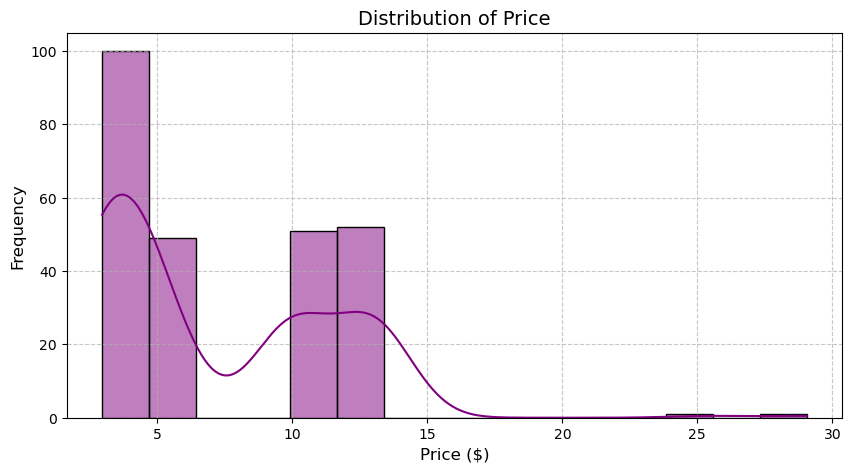

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(data["Price"], kde=True,bins=15, color="purple")
plt.title("Distribution of Price",fontsize=14)
plt.xlabel("Price ($)",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.grid(True, linestyle = "--", alpha= 0.7)
plt.savefig("Price_Distribution.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing the Distribution of Quantity

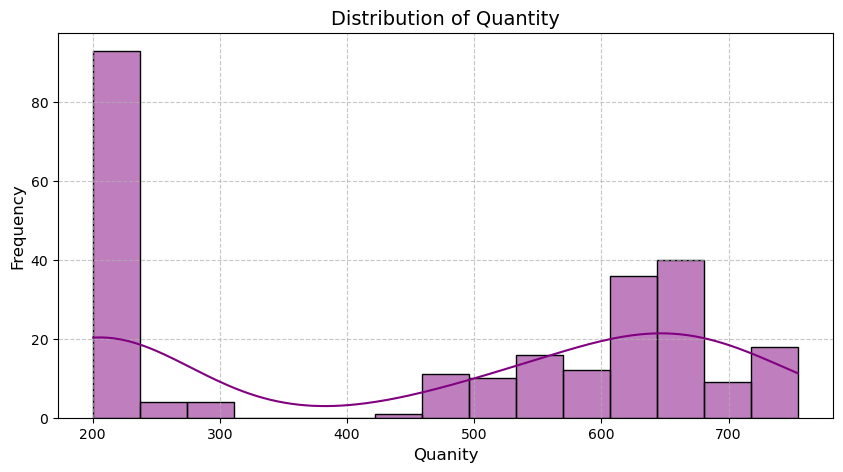

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(data["Quantity"], kde=True,bins=15, color="purple")
plt.title("Distribution of Quantity",fontsize=14)
plt.xlabel("Quanity",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.grid(True,linestyle="--",alpha= 0.7)
plt.savefig("Quantity_Distribution.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing the Distribution of Revenue

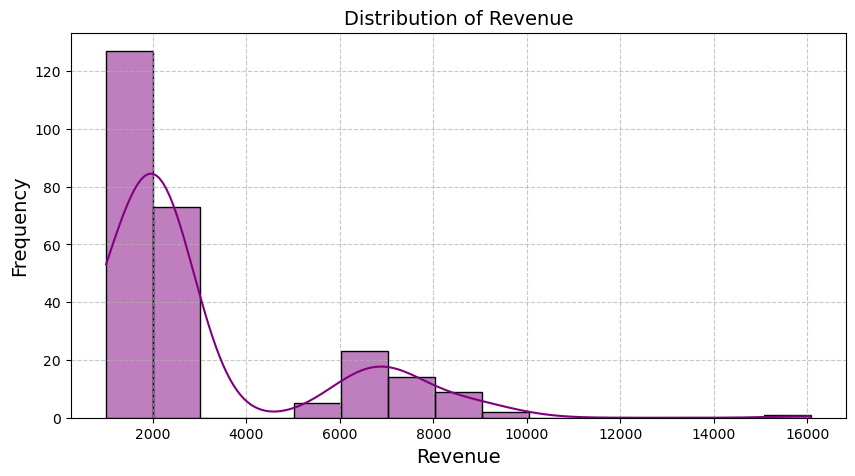

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(data["Revenue"], kde=True, bins=15, color= "purple")
plt.title("Distribution of Revenue", fontsize=14)
plt.xlabel("Revenue",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("Revenue_Distribution.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Price Distribution with a Boxplot

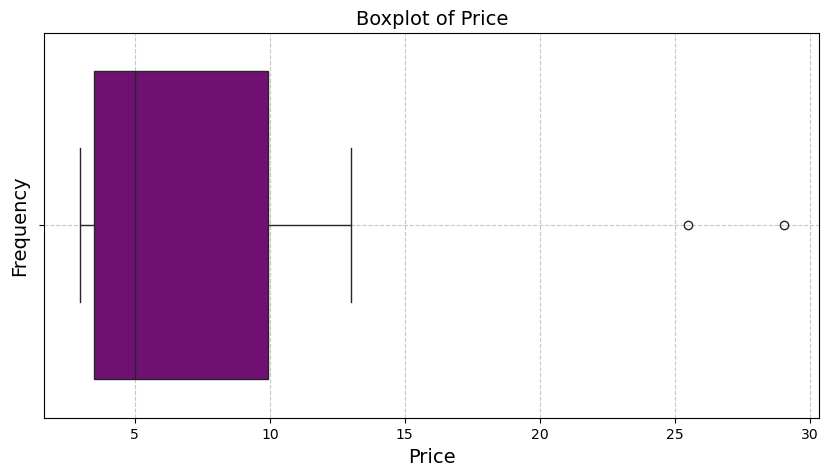

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Price'],color="purple") 
plt.title('Boxplot of Price',fontsize=14) 
plt.xlabel("Price",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.grid(True,linestyle ="--",alpha =0.7)
plt.savefig("Price_Boxplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Quantity Distribution with a Boxplot

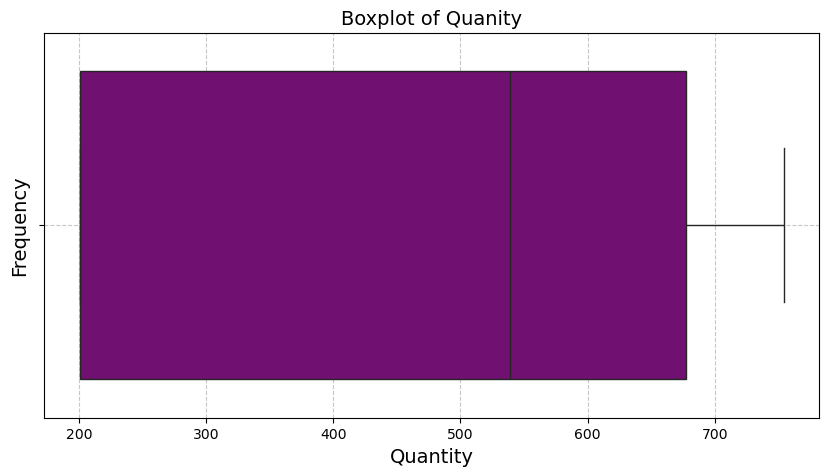

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data["Quantity"], color= "purple")
plt.title("Boxplot of Quanity",fontsize=14)
plt.xlabel("Quantity",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.grid(True, linestyle="--",alpha=0.7)
plt.savefig("Quantity_Boxplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Revenue Distribution with a Boxplot

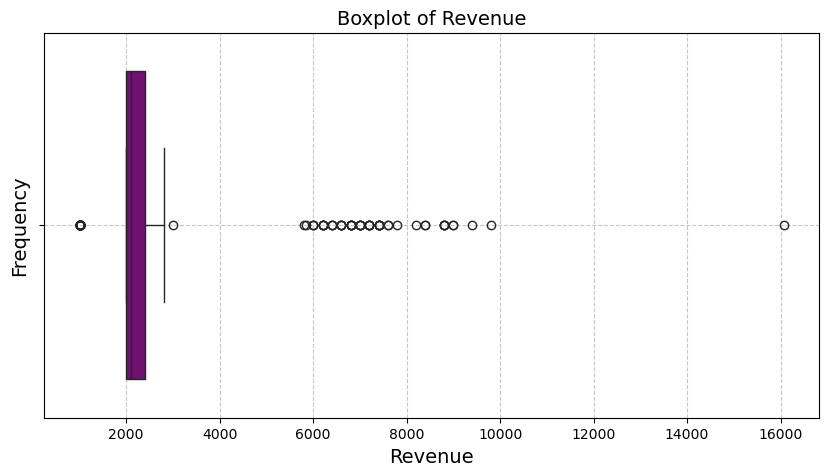

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data["Revenue"],color="purple")
plt.title("Boxplot of Revenue",fontsize=14)
plt.xlabel("Revenue",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.grid(True,linestyle="--",alpha=0.7)
plt.savefig("Revenue_Boxplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Number of Orders per Product

In [74]:
data["Product"].value_counts()

Product
Burgers               52
Chicken Sandwiches    52
Fries                 51
Beverages             50
Sides & Other         49
Name: count, dtype: int64

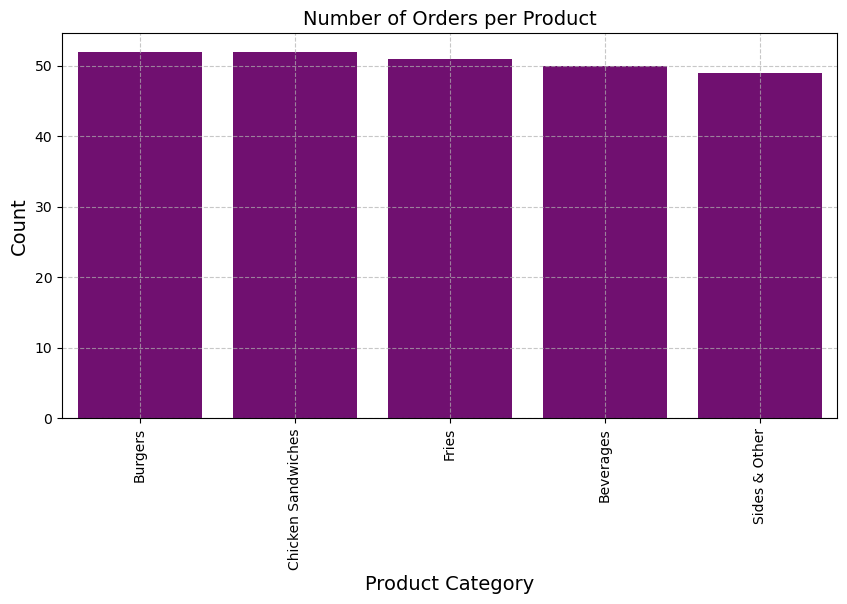

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product', data=data, order=data['Product'].value_counts().index, color="purple")
plt.xticks(rotation=90)  # rotate labels if too many
plt.title('Number of Orders per Product',fontsize=14)
plt.xlabel("Product Category",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.grid(True,linestyle="--",alpha=0.7)
plt.savefig("Product_Countplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Number of Orders by Purchase Type

In [79]:
data["Purchase Type"].value_counts()

Purchase Type
Online         107
In-store        86
Drive-thru      61
Name: count, dtype: int64

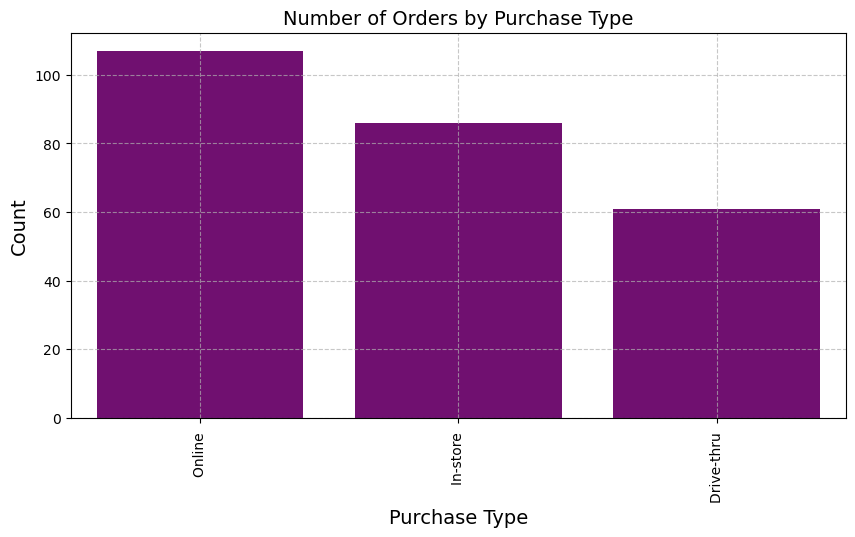

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x="Purchase Type", data=data, order=data["Purchase Type"].value_counts().index, color="purple")
plt.xticks(rotation=90)
plt.title('Number of Orders by Purchase Type',fontsize=14)
plt.xlabel("Purchase Type",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.grid(True,linestyle="--",alpha=0.7)
plt.savefig("PurchaseType_Countplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Number of Orders by Payment Method

In [84]:
data["Payment Method"].value_counts()

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

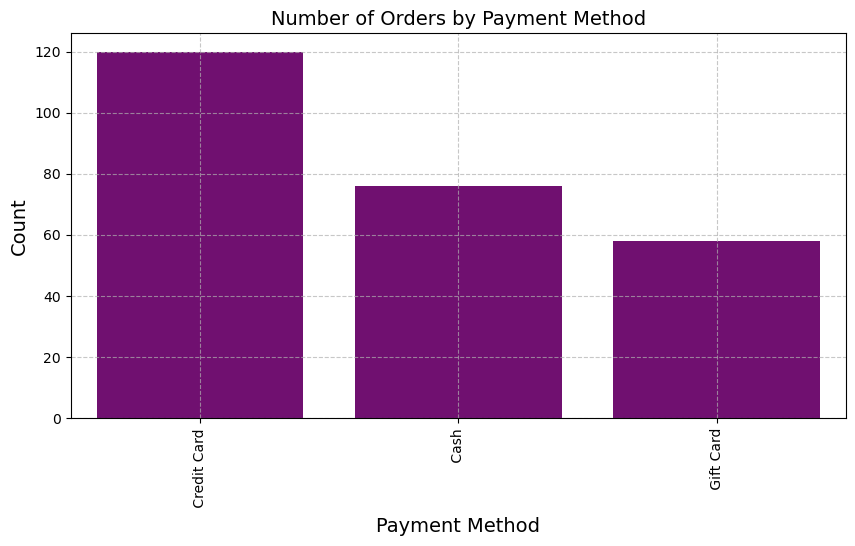

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x="Payment Method",data=data,order=data["Payment Method"].value_counts().index, color="purple")
plt.xticks(rotation=90)
plt.title('Number of Orders by Payment Method',fontsize=14)
plt.xlabel("Payment Method",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.grid(True,linestyle="--",alpha=0.7)
plt.savefig("PaymentMethod_Countplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Number of Orders by Manager

In [89]:
data["Manager"].value_counts()

Manager
Tom Jackson      75
Joao Silva       75
Pablo Perez      46
Walter Muller    30
Remy Monet       28
Name: count, dtype: int64

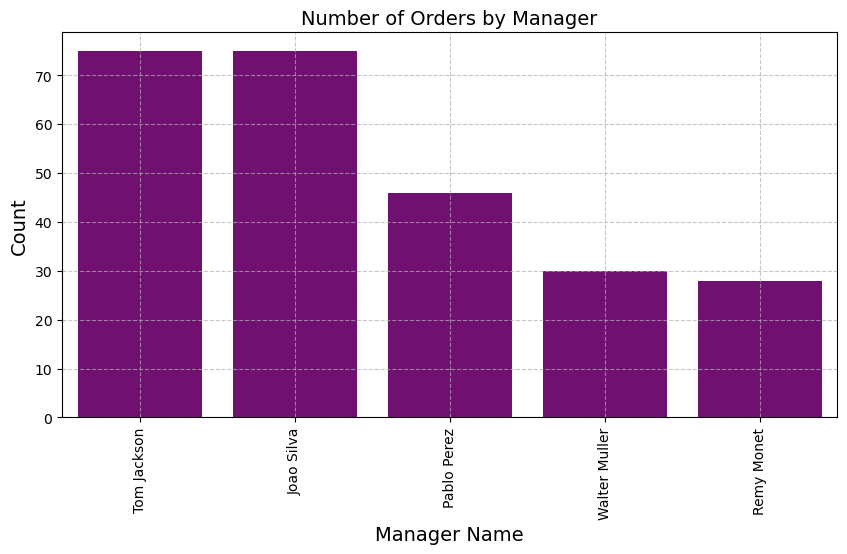

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(x="Manager", data=data, order=data["Manager"].value_counts().index, color="purple")
plt.xticks(rotation=90)
plt.title('Number of Orders by Manager', fontsize=14)
plt.xlabel("Manager Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True,linestyle="--", alpha=0.7)
plt.savefig("Manager_Countplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Number of Orders by City

In [93]:
data["City"].value_counts()

City
London    75
Lisbon    75
Madrid    46
Berlin    30
Paris     28
Name: count, dtype: int64

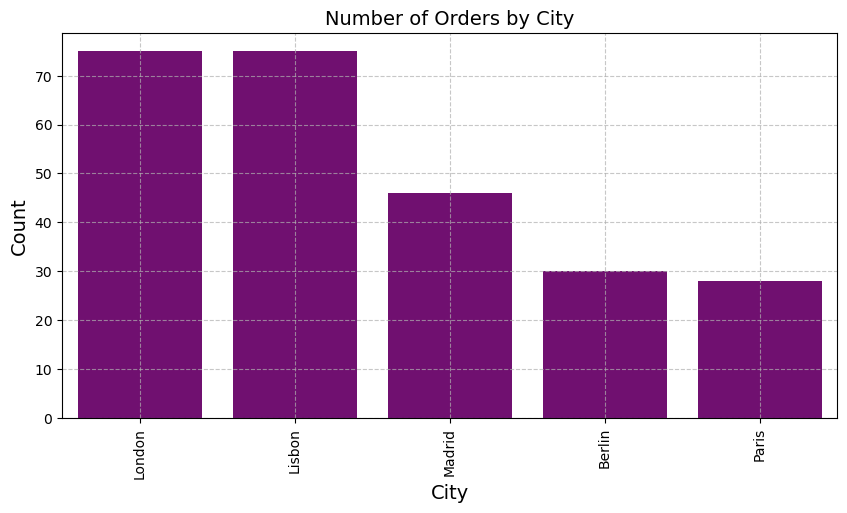

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x="City", data=data, order=data["City"].value_counts().index, color="purple")
plt.xticks(rotation=90)
plt.title('Number of Orders by City',fontsize=14)
plt.xlabel("City", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True,linestyle="--", alpha=0.7)
plt.savefig("City_Countplot.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Order Distribution by Purchase Type Using Pie Chart

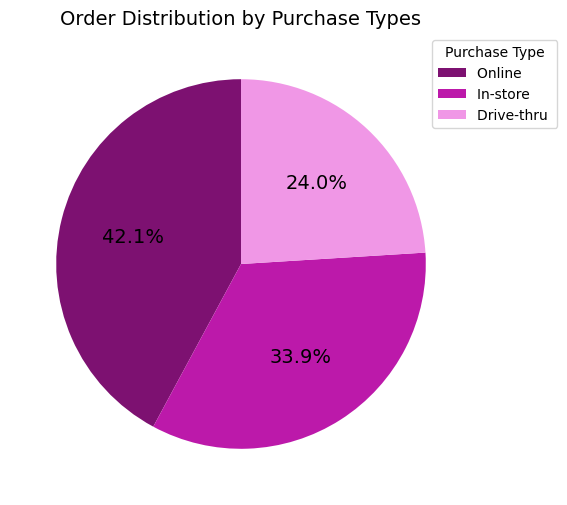

In [99]:
purchase_counts = data['Purchase Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(purchase_counts, autopct='%1.1f%%', startangle=90, colors=['#7d1171','#bc19aa','#f097e6'],textprops={'fontsize': 14, 'color': 'black'})
plt.legend(purchase_counts.index,title="Purchase Type",loc="upper right",bbox_to_anchor=(1.2, 1))
plt.title('Order Distribution by Purchase Types',fontsize=14)
plt.savefig("PurchaseType_Pie.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visuslizing Order Distribution by Product Using Pie Chart

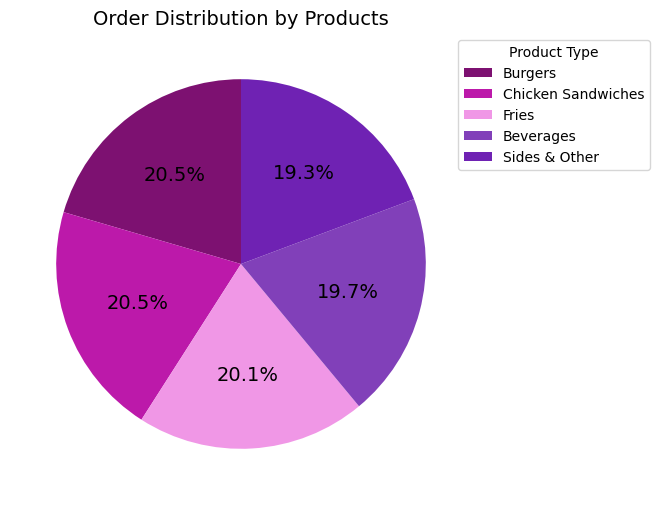

In [102]:
product_counts = data['Product'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(product_counts, autopct='%1.1f%%', startangle=90, colors=['#7d1171','#bc19aa','#f097e6','#8140b9','#6f22b3'],textprops={'fontsize': 14, 'color': 'black'})
plt.legend(product_counts.index,title="Product Type",loc="upper right",bbox_to_anchor=(1.4, 1))
plt.title('Order Distribution by Products',fontsize=14)
plt.savefig("Product_Pie.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Order Distribution by Payment Method Using Pie Chart

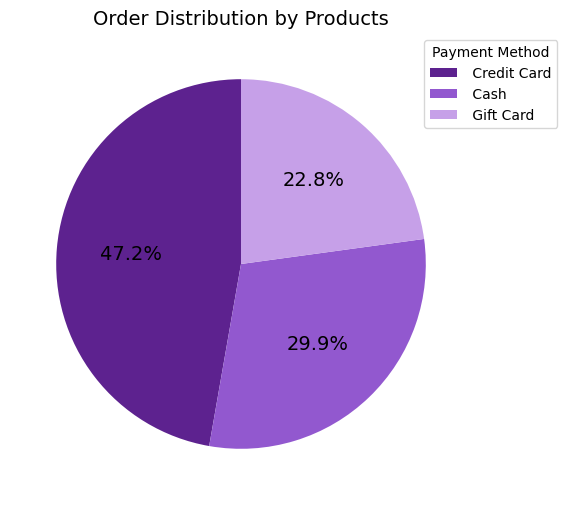

In [107]:
payment_method = data['Payment Method'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_method, autopct='%1.1f%%', startangle=90, colors=['#5d228f','#9258cf','#c6a0e8'],textprops={'fontsize': 14, 'color': 'black'})
plt.legend(payment_method.index,title="Payment Method",loc="upper right",bbox_to_anchor=(1.2, 1))
plt.title('Order Distribution by Products',fontsize=14)
plt.savefig("PaymentMethod_Pie.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Order Distribution by City Using Pie Chart

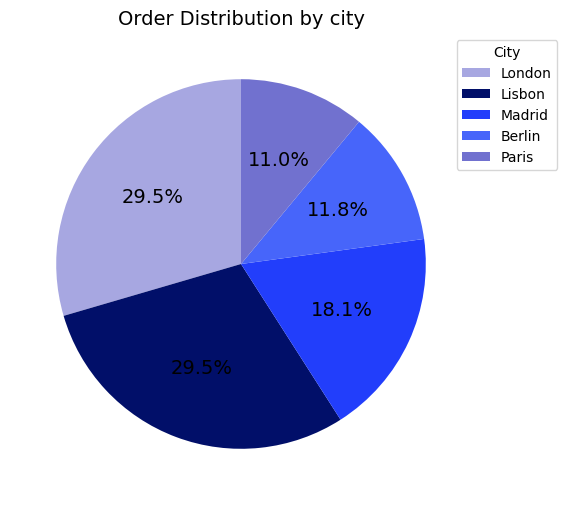

In [110]:
city_counts = data['City'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(city_counts, autopct='%1.1f%%', startangle=90, colors=['#a7a7e1','#010f69','#223efb','#4765fa','#7171cf'],textprops={'fontsize': 14, 'color': 'black'})
plt.legend(city_counts.index,title="City",loc="upper right",bbox_to_anchor=(1.2, 1))
plt.title('Order Distribution by city',fontsize=14)
plt.savefig("City_Pie.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Visualizing Order Distribution by Manager Using Pie Chart

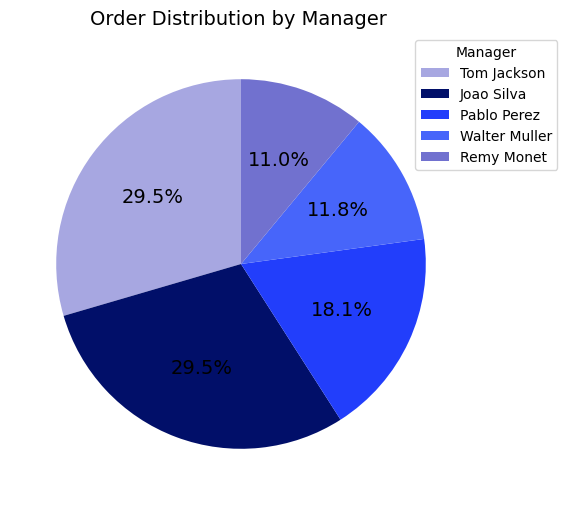

In [113]:
manager_counts = data['Manager'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(manager_counts, autopct='%1.1f%%', startangle=90, colors=['#a7a7e1','#010f69','#223efb','#4765fa','#7171cf'],textprops={'fontsize': 14, 'color': 'black'})
plt.legend(manager_counts.index,title="Manager",loc="upper right",bbox_to_anchor=(1.2, 1))
plt.title('Order Distribution by Manager ',fontsize=14)
plt.savefig("Manager_Pie.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# <u>Conclusion</u>

After performing an EDA on the restaurant sales dataset (from 7th November 2022 to 29th December 2022), I uncovered several key insights about product popularity, customer behavior, payment methods, manager performance, and city-level sales trends.

### 1.Product Popularity

Burgers and Chicken Sandwiches are the most ordered items at 20.5% each, followed by Fries (20.1%), Beverages (19.7%), and Sides & Other (19.3%). These numbers indicate that classic fast-food items dominate customer preferences. Restaurants can leverage this by creating promotions or bundles featuring these popular products.

### 2.Purchase Type Preferences

Online orders account for 42.1% of total orders, In-store purchases make up 33.9%, and Drive-thru orders represent 24.0%. This highlights the growing importance of digital sales channels, suggesting a need to optimize online ordering systems for convenience and efficiency.

### 3.Payment Method Usage

Credit Card is the most frequently used payment method at 47.2%, followed by Cash (29.9%) and Gift Card (22.8%). These insights can guide restaurants to ensure smooth payment experiences and adapt marketing or loyalty programs for the most-used payment methods.

### 4.Manager Performance

Tom Jackson and Joao Silva handled 29.5% of orders each, while Pablo Perez handled 18.1%, Walter Muller 11.8%, and Remy Monet 11.0%. Recognizing high-performing managers can help share best practices and improve overall team performance.

### 5.City-Level Insights

London and Lisbon lead in sales at 29.5% each, followed by Madrid (18.1%), Berlin (11.8%), and Paris (11.0%). This information can inform targeted marketing, resource allocation, and strategic expansion for locations performing below average.

## Overall Insights

The analysis shows clear patterns in customer behavior and operational performance.

Key takeaways for restaurants include are 

- Focus on high-demand products to maximize revenue.

- Optimize online ordering systems to cater to the majority of customers.

- Share best practices from top-performing managers to improve efficiency.

- Strategically plan marketing and inventory for high- and low-performing cities.